In [2]:
%pylab inline
import pandas as pd
from sklearn.cross_validation import LeaveOneOut
from ggplot import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
train_df = pd.read_csv('train.csv', parse_dates=[1])

In [4]:
print train_df.head()

   Id  Open Date        City  City Group Type  P1   P2  P3  P4  P5   ...     \
0   0 1999-07-17    İstanbul  Big Cities   IL   4  5.0   4   4   2   ...      
1   1 2008-02-14      Ankara  Big Cities   FC   4  5.0   4   4   1   ...      
2   2 2013-03-09  Diyarbakır       Other   IL   2  4.0   2   5   2   ...      
3   3 2012-02-02       Tokat       Other   IL   6  4.5   6   6   4   ...      
4   4 2009-05-09   Gaziantep       Other   IL   3  4.0   3   4   2   ...      

   P29  P30  P31  P32  P33  P34  P35  P36  P37  revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753  
1  3.0    0    0    0    0    0    0    0    0  6923131  
2  3.0    0    0    0    0    0    0    0    0  2055379  
3  7.5   25   12   10    6   18   12   12    6  2675511  
4  3.0    5    1    3    2    3    4    3    3  4316715  

[5 rows x 43 columns]


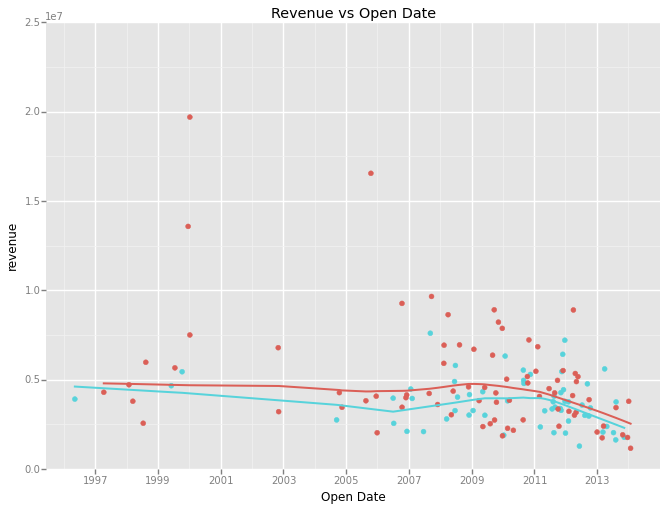

<ggplot: (8741912887077)>

In [5]:
ggplot(aes('Open Date', 'revenue', color='City Group'), data=train_df) + geom_point(size = 24) +\
    ggtitle('Revenue vs Open Date') +\
    geom_smooth(size=2, se=False)

In [6]:
train_df_wo_outliers = train_df[ train_df.revenue < 10000000 ]
train_df_wo_outliers.shape

(134, 43)

In [7]:
train_df_wo_outliers.revenue.mean()

4181438.3656716417

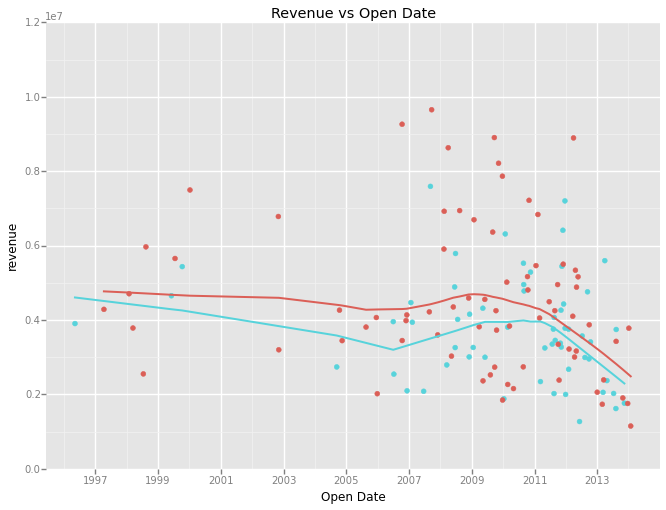

<ggplot: (8741916107341)>

In [8]:
ggplot(aes('Open Date', 'revenue', color='City Group'), data=train_df_wo_outliers) + geom_point(size = 24) +\
    ggtitle('Revenue vs Open Date') +\
    geom_smooth(size=2, se=False)

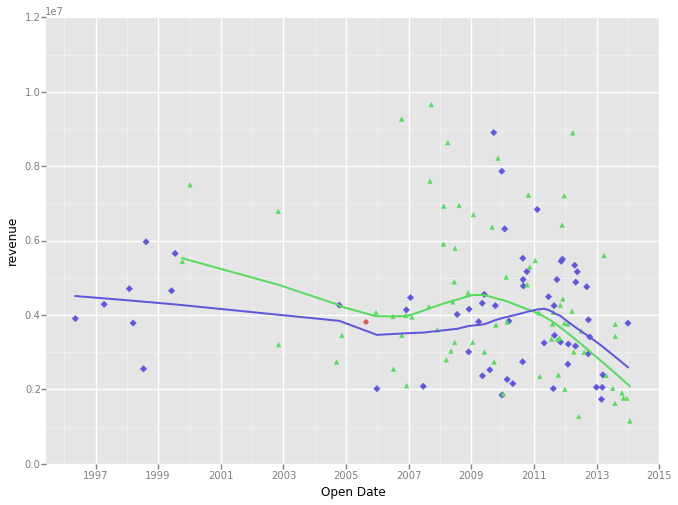

<ggplot: (8741911747925)>

In [26]:
p = ggplot(aes('Open Date', 'revenue', color='Type', shape='Type'), data=train_df_wo_outliers) +\
    geom_point() + geom_smooth(size=2, se=False)
p

In [13]:
import plotly

In [15]:
plotly.plotly.plot(p)

PlotlyError: The `figure_or_data` positional argument must be either `dict`-like or `list`-like.

In [7]:
loo = LeaveOneOut(134)

In [8]:
test_1_predicts = []
errs = []
for train, test in loo:
    train_1 = train_df_wo_outliers.iloc[ train ]
    test_1_pred = train_1.revenue.mean()
    test_1_predicts.append(test_1_pred)
    test_1_label = train_df_wo_outliers.iloc[ test ].revenue.iloc[0]
    errs.append(test_1_pred - test_1_label)

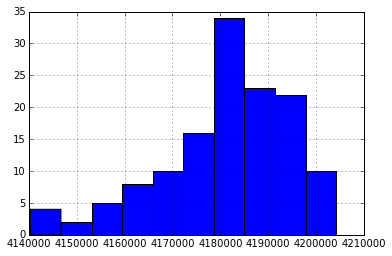

In [9]:
pd.Series(data=test_1_predicts).hist()

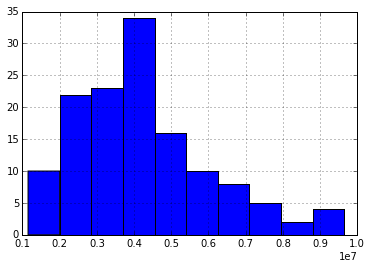

In [79]:
train_df_wo_outliers.revenue.hist()

In [66]:
err_series = pd.Series(data=errs)

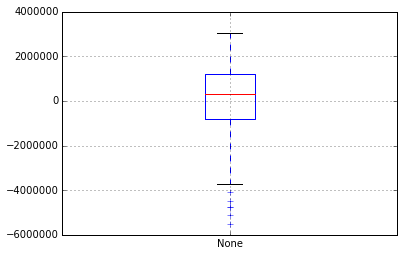

In [67]:
err_series.plot(kind='box')

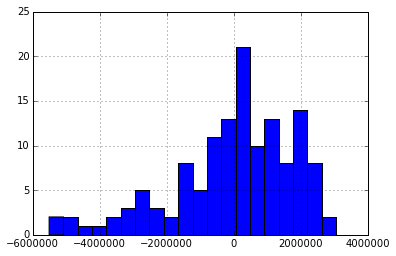

In [70]:
err_series.hist(bins=20)

In [77]:
test_rmse = sqrt( np.mean(err_series ** 2) )
print 'Cross validation estimated test error (RMSE) : \n'
print "{:,}".format(test_rmse)

Cross validation estimated test error (RMSE) : 

1,806,348.34393


## How many data points do we have for pre-2007, 2007-2011 and post-2011

In [22]:
pre2007_df = train_df_wo_outliers[train_df_wo_outliers['Open Date'] < datetime.datetime(2006,12,31)]
print 'We have {} data points open before 2007'.format(pre2007_df.shape[0])
post2011_df = train_df_wo_outliers[train_df_wo_outliers['Open Date'] > datetime.datetime(2011,12,31)]
print 'We have {} data points open after 2011'.format(post2011_df.shape[0])
print 'We have {} data points open between 2007 and 2011'.format(train_df_wo_outliers.shape[0] - pre2007_df.shape[0] - post2011_df.shape[0])

We have 25 data points open before 2007
We have 32 data points open after 2011
We have 77 data points open between 2007 and 2011
